In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx import (draw, DiGraph, Graph)

In [3]:
alignedbarcode = np.loadtxt("/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/Sequencing/Processed_data/BRAC5676.1h/trial/unzipped/barcodesplitter/bowtiealignment_barcode_2.txt", dtype=int)

print(alignedbarcode)

[[   1    1]
 [   4    4]
 [   5    5]
 ...
 [9142 9137]
 [9142 9136]
 [9142 9135]]


Group barcodes according to cluster (same as previously done for UMI)

In [4]:
G=nx.Graph()
G.add_edges_from(alignedbarcode)
barcodes =(sorted(nx.connected_components(G), key = len, reverse=True))

For each set of aligned barcode in list take the lowest barcode line number as barcode label and the count number of barcodes in each set.

In [5]:
barcode_sorted = pd.DataFrame(columns=['line', 'barcode_frequency'])

for i in barcodes:

    barcode_sorted = barcode_sorted.append({'line': (min(i)), 'barcode_frequency': (len(i))},ignore_index=True)

In [6]:
print(barcode_sorted)

      line barcode_frequency
0     9043                24
1     2340                21
2     3163                20
3     3241                19
4     4698                19
...    ...               ...
3376  9126                 1
3377  9127                 1
3378  9128                 1
3379  9143                 1
3380  9144                 1

[3381 rows x 2 columns]


Remove unique barcodes

In [6]:
barcode_final = barcode_sorted[barcode_sorted.barcode_frequency >1]

In [29]:
barcode_final

,line,barcode_frequency
0,9043,24
1,2340,21
2,3163,20
3,3241,19
4,4698,19
...,...,...
1378,9040,2
1379,9073,2
1380,9077,2
1381,9083,2


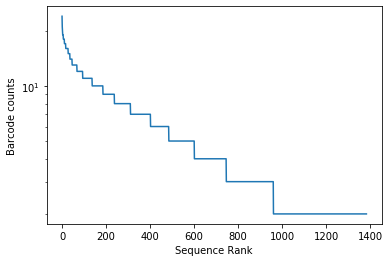

In [30]:
plt.figure()

plt.xlabel('Sequence Rank')
plt.ylabel('Barcode counts')
l=  len(barcode_final)
x = list(range(0, l))



plt.semilogy(x, barcode_final['barcode_frequency'])

In [7]:
barcodes = np.loadtxt("/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/Sequencing/Processed_data/BRAC5676.1h/trial/unzipped/barcodesplitter/barcodes_final_sorted_fasta.txt", dtype=str, delimiter = " ")
line = (barcodes[::2])
sequence = (barcodes[1::2])
line = np.char.strip(line, chars ='>')
barcode_seq = pd.DataFrame(columns = ['line', 'sequence'])
barcode_seq['line'] = line
barcode_seq['sequence'] = sequence

In [8]:
barcode_final['sequence'] = barcode_final.line.map(barcode_seq.sequence)

<ipython-input-8-b50c25ec6203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barcode_final['sequence'] = barcode_final.line.map(barcode_seq.sequence)


Check whether the sequence is a spike-in sequence, and put in separate column



In [25]:
barcode_final['is_spike?'] = barcode_final['sequence'].str.contains('ATCAGTCA', regex=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)

<ipython-input-25-2bd0d95c74cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barcode_final['is_spike?'] = barcode_final['sequence'].str.contains('ATCAGTCA', regex=True)


Save final barcode count file

In [26]:
barcode_final.to_csv("/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/Sequencing/Processed_data/BRAC5676.1h/trial/unzipped/barcodesplitter/barcodes_final.txt", header=None, index=None, sep=' ', mode='a')